# 1. Libraries and dataset import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Seaborn configuration
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

# Load data
path = 'path_to_your_data_directory/'
df = pd.read_csv(path + 'pumps_dataset_enhanced.csv')
print(f"Shape: {df.shape}")

Shape: (1000, 26)


# 2. Researching dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pump_id                         1000 non-null   int64  
 1   well_id                         1000 non-null   int64  
 2   group                           1000 non-null   object 
 3   pump_size_model                 1000 non-null   object 
 4   expected_failure_interval_days  1000 non-null   float64
 5   num_failures_3years             1000 non-null   int64  
 6   failure_dates                   1000 non-null   object 
 7   failure_modes                   320 non-null    object 
 8   failure_causes                  320 non-null    object 
 9   avg_flow_rate_m3_day            1000 non-null   float64
 10  avg_discharge_pressure_MPa      1000 non-null   float64
 11  avg_inlet_pressure_MPa          1000 non-null   float64
 12  avg_motor_temperature_C         100

MTBF - Mean Time Between Failure\
MTTR - Mean Time To Repair

In [4]:
df.sample(10)

,pump_id,well_id,group,pump_size_model,expected_failure_interval_days,num_failures_3years,failure_dates,failure_modes,failure_causes,avg_flow_rate_m3_day,...,MTBF_days,MTTR_days,avg_days_between_failures,pump_efficiency_percent,uptime_percent,maintenance_cost_USD,operational_state,total_operating_days,study_start_date,study_end_date
993,994,994,Group_E_Reliable,ESP_130,1095.0,0,No failures,NaN,NaN,164.16,...,1095.0,0.00,0.0,88.38,100.00,3430.39,Active,1095,2022-01-01,2024-12-31
642,643,643,Group_E_Reliable,ESP_250,1095.0,0,No failures,NaN,NaN,127.55,...,1095.0,0.00,0.0,97.49,100.00,4552.34,Active,1095,2022-01-01,2024-12-31
379,380,380,Group_E_Reliable,ESP_250,1095.0,0,No failures,NaN,NaN,100.86,...,1095.0,0.00,0.0,95.77,100.00,3328.08,Active,1095,2022-01-01,2024-12-31
996,997,997,Group_E_Reliable,ESP_80,1095.0,0,No failures,NaN,NaN,192.21,...,1095.0,0.00,0.0,99.04,100.00,2494.22,Active,1095,2022-01-01,2024-12-31
165,166,166,Group_B,ESP_130,365.0,2,2023-02-12; 2024-04-04,Seal_Failure; Sand_Clogging,Pressure_Spike; Improper_Maintenance,247.20,...,546.5,0.88,417.0,89.40,99.84,6338.63,Active,1095,2022-01-01,2024-12-31
142,143,143,Group_B,ESP_360,365.0,3,2022-11-27; 2023-10-04; 2024-08-26,Bearing_Wear; Cavitation; Electrical_Short,High_Temperature; Low_Inlet_Pressure; Voltage_...,184.39,...,364.0,2.15,319.0,89.43,99.41,6827.13,Active,1095,2022-01-01,2024-12-31
516,517,517,Group_E_Reliable,ESP_80,1095.0,0,No failures,NaN,NaN,123.36,...,1095.0,0.00,0.0,90.70,100.00,3505.81,Active,1095,2022-01-01,2024-12-31
755,756,756,Group_E_Reliable,ESP_80,1095.0,0,No failures,NaN,NaN,116.93,...,1095.0,0.00,0.0,94.23,100.00,2285.14,Active,1095,2022-01-01,2024-12-31
817,818,818,Group_E_Reliable,ESP_130,1095.0,0,No failures,NaN,NaN,122.70,...,1095.0,0.00,0.0,93.84,100.00,4162.45,Active,1095,2022-01-01,2024-12-31
556,557,557,Group_E_Reliable,ESP_250,1095.0,0,No failures,NaN,NaN,139.26,...,1095.0,0.00,0.0,94.33,100.00,4120.16,Active,1095,2022-01-01,2024-12-31


In [5]:
print(f"GROUP DISTRIBUTION:")
for group in df['group'].unique():
    count = len(df[df['group'] == group])
    print(f"   {group}: {count} pumps")

print(f"\nPUMP MODELS:")
for model in df['pump_size_model'].unique():
    count = len(df[df['pump_size_model'] == model])
    print(f"   {model}: {count} pumps")

print(f"\nFAILURE STATISTICS:")
print(f"   Pumps with failures: {(df['num_failures_3years'] > 0).sum()}")
print(f"   Pumps without failures: {(df['num_failures_3years'] == 0).sum()}")
print(f"   Total failures recorded: {df['num_failures_3years'].sum()}")

print(f"\nKEY METRICS RANGES:")
print(f"   Efficiency: {df['pump_efficiency_percent'].min():.2f}% - {df['pump_efficiency_percent'].max():.2f}%")
print(f"   Temperature: {df['avg_motor_temperature_C'].min():.2f}°C - {df['avg_motor_temperature_C'].max():.2f}°C")
print(f"   MTBF: {df['MTBF_days'].min():.0f} - {df['MTBF_days'].max():.0f} days")
print(f"   Maintenance Cost: ${df['maintenance_cost_USD'].min():.2f} - ${df['maintenance_cost_USD'].max():.2f}")


GROUP DISTRIBUTION:
   Group_A: 100 pumps
   Group_B: 100 pumps
   Group_C: 100 pumps
   Group_D: 20 pumps
   Group_E_Reliable: 680 pumps

PUMP MODELS:
   ESP_250: 311 pumps
   ESP_360: 85 pumps
   ESP_130: 298 pumps
   ESP_80: 306 pumps

FAILURE STATISTICS:
   Pumps with failures: 320
   Pumps without failures: 680
   Total failures recorded: 1125

KEY METRICS RANGES:
   Efficiency: 50.00% - 99.96%
   Temperature: 60.06°C - 89.89°C
   MTBF: 90 - 1095 days
   Maintenance Cost: $2005.80 - $26993.20


Dataset contains classification by groups, grouping pumps by reliability. That makes it easier to understand, which pump is in a "risk" group.

Failure statistics by group:
              group  Total Failures  Pump Count  Avg Failures per Pump
3           Group_D             230          20                  11.50
2           Group_C             542         100                   5.42
1           Group_B             253         100                   2.53
0           Group_A             100         100                   1.00
4  Group_E_Reliable               0         680                   0.00


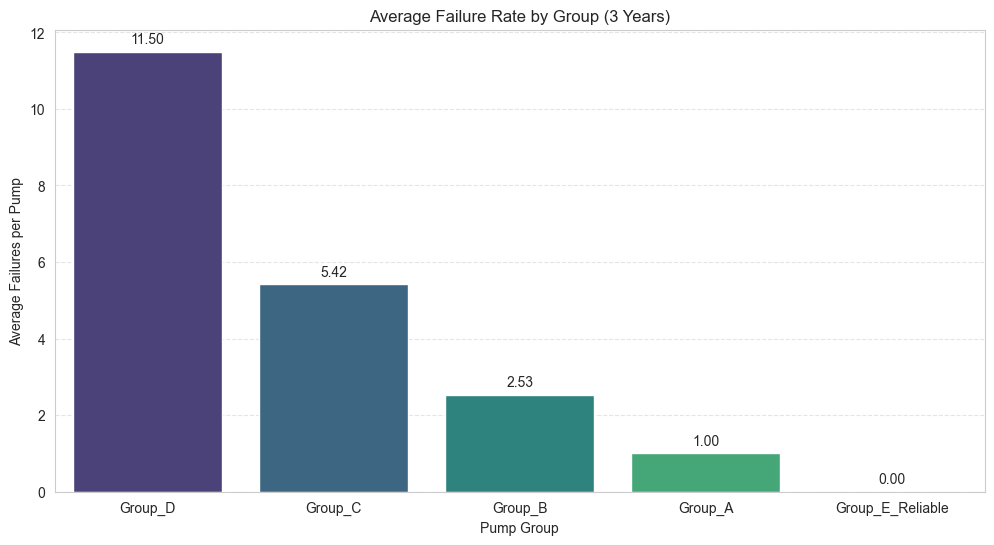

In [6]:
# Group by 'group' and calculate statistics
group_stats = df.groupby('group')['num_failures_3years'].agg(['sum', 'count', 'mean']).reset_index()
group_stats.rename(columns={
    'sum': 'Total Failures', 
    'count': 'Pump Count', 
    'mean': 'Avg Failures per Pump'
}, inplace=True)

# Sort by average failures per pump
group_stats = group_stats.sort_values('Avg Failures per Pump', ascending=False)

print("Failure statistics by group:")
print(group_stats)

# Visualize average failures per pump by group
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=group_stats, x='group', y='Avg Failures per Pump', palette='viridis')
plt.title('Average Failure Rate by Group (3 Years)', fontsize=12)
plt.xlabel('Pump Group', fontsize=10)
plt.ylabel('Average Failures per Pump', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

So, we can see, that the most failure-prone group is Group_D, while all other groups have less failures in average. And Group_E is literally a group without any failures.

# 3. Data cleaning

In [7]:
df_clean = df.copy()

# Handle missing values
df_clean['failure_modes'].fillna('No_Failure', inplace=True)
df_clean['failure_causes'].fillna('No_Failure', inplace=True)

# Create binary target (1 if pump had any failures)
df_clean['has_failures'] = (df_clean['num_failures_3years'] > 0).astype(int)

# Create additional features
df_clean['failure_rate_per_year'] = df_clean['num_failures_3years'] / 3
df_clean['reliability_score'] = (df_clean['MTBF_days'] / df_clean['expected_failure_interval_days'] * 100).round(2)

# Categorize operational conditions
df_clean['temperature_risk'] = pd.cut(df_clean['avg_motor_temperature_C'], 
                                       bins=[0, 65, 75, 90], 
                                       labels=['Low', 'Medium', 'High'])

df_clean['vibration_risk'] = pd.cut(df_clean['avg_vibration_mm_s'], 
                                     bins=[0, 3, 5, 8], 
                                     labels=['Low', 'Medium', 'High'])

print("Data preprocessing complete!")
print(f"\nTarget variable distribution:")
print(f"   No failures: {(df_clean['has_failures'] == 0).sum()} ({(df_clean['has_failures'] == 0).sum()/len(df_clean)*100:.1f}%)")
print(f"   Has failures: {(df_clean['has_failures'] == 1).sum()} ({(df_clean['has_failures'] == 1).sum()/len(df_clean)*100:.1f}%)")

Data preprocessing complete!

Target variable distribution:
   No failures: 680 (68.0%)
   Has failures: 320 (32.0%)


In [8]:
df_clean.isnull().sum()

pump_id                           0
well_id                           0
group                             0
pump_size_model                   0
expected_failure_interval_days    0
num_failures_3years               0
failure_dates                     0
failure_modes                     0
failure_causes                    0
avg_flow_rate_m3_day              0
avg_discharge_pressure_MPa        0
avg_inlet_pressure_MPa            0
avg_motor_temperature_C           0
avg_vibration_mm_s                0
avg_motor_current_A               0
avg_power_consumption_kW          0
MTBF_days                         0
MTTR_days                         0
avg_days_between_failures         0
pump_efficiency_percent           0
uptime_percent                    0
maintenance_cost_USD              0
operational_state                 0
total_operating_days              0
study_start_date                  0
study_end_date                    0
has_failures                      0
failure_rate_per_year       

No more Null or NaN cells in dataset.

# 4. Distribution visualisation

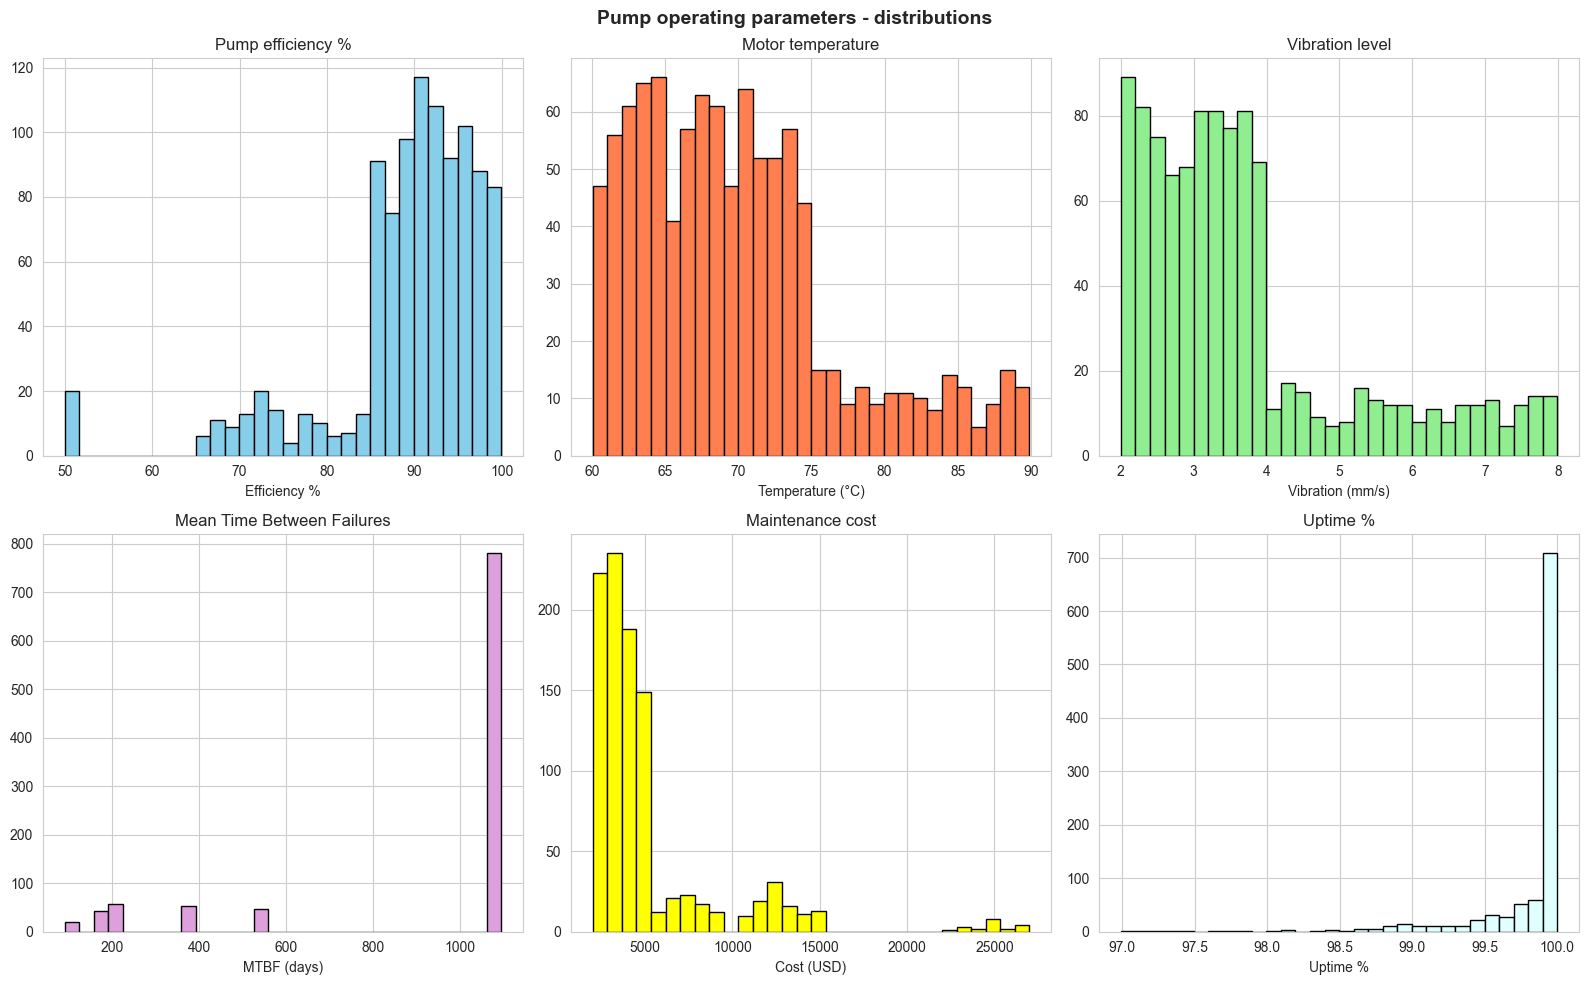

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Pump operating parameters - distributions', fontsize=14, fontweight='bold')

axes[0, 0].hist(df_clean['pump_efficiency_percent'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Pump efficiency %')
axes[0, 0].set_xlabel('Efficiency %')

axes[0, 1].hist(df_clean['avg_motor_temperature_C'], bins=30, color='coral', edgecolor='black')
axes[0, 1].set_title('Motor temperature')
axes[0, 1].set_xlabel('Temperature (°C)')

axes[0, 2].hist(df_clean['avg_vibration_mm_s'], bins=30, color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Vibration level')
axes[0, 2].set_xlabel('Vibration (mm/s)')

axes[1, 0].hist(df_clean['MTBF_days'], bins=30, color='plum', edgecolor='black')
axes[1, 0].set_title('Mean Time Between Failures')
axes[1, 0].set_xlabel('MTBF (days)')

axes[1, 1].hist(df_clean['maintenance_cost_USD'], bins=30, color='yellow', edgecolor='black')
axes[1, 1].set_title('Maintenance cost')
axes[1, 1].set_xlabel('Cost (USD)')

axes[1, 2].hist(df_clean['uptime_percent'], bins=30, color='lightcyan', edgecolor='black')
axes[1, 2].set_title('Uptime %')
axes[1, 2].set_xlabel('Uptime %')

plt.tight_layout()
plt.show()


The histogram illustrates the frequency of failures across the entire fleet of 1000 pumps. Key observations include:

1.  While most pumps are reliable, there is a visible "tail" extending to the both right or left. This represents a small number of pumps experiencing a very high number of failures.
2.  The data does not follow a standard Bell Curve. It suggests that failures are not random events distributed equally, but rather driven by specific "bad actors" or severe operating conditions.
3.  The distribution confirms a classic 80/20 rule scenario: a small percentage of "problematic" pumps are responsible for the vast majority of maintenance efforts. Identifying and fixing these specific units will yield the highest ROI.

# 5. Correlation analysis

Top features correlated with pump failures:
has_failures                 1.000000
MTTR_days                    0.901488
failure_rate_per_year        0.725376
num_failures_3years          0.725376
avg_days_between_failures    0.702389
reliability_score            0.696209
avg_vibration_mm_s           0.694298
maintenance_cost_USD         0.627545
avg_motor_temperature_C      0.499012
avg_power_consumption_kW     0.427776
dtype: float64


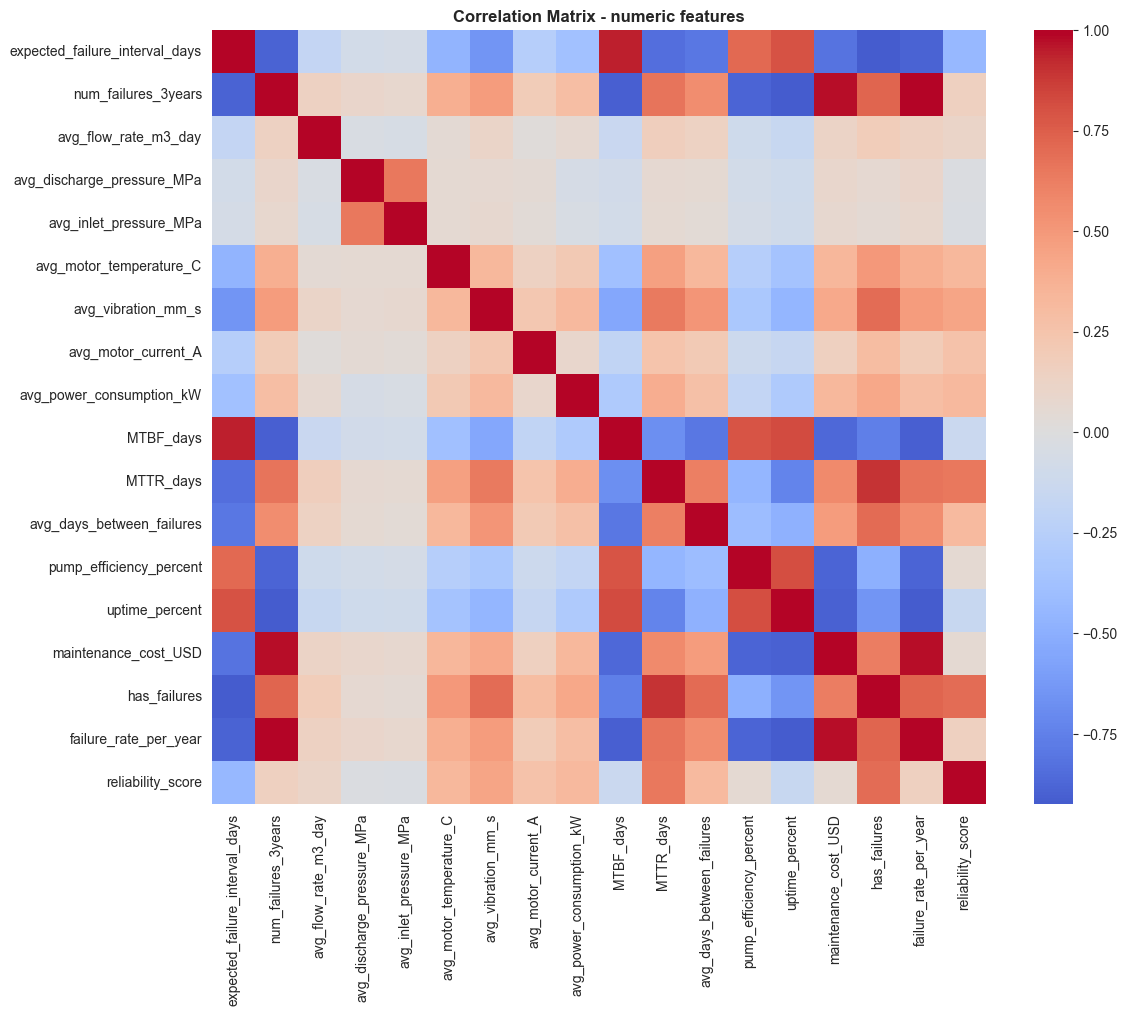

In [10]:
# Select numeric columns
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['pump_id', 'well_id', 'total_operating_days']]

# Calculate correlation with failures
correlation_with_failures = df_clean[numeric_cols].corrwith(df_clean['has_failures']).sort_values(ascending=False)

print("Top features correlated with pump failures:")
print(correlation_with_failures.head(10))

# Plot correlation matrix
corr_matrix = df_clean[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, square=True)
plt.title('Correlation Matrix - numeric features', fontweight='bold')
plt.tight_layout()
plt.show()


The correlation matrix reveals the relationships between different operational metrics. Here are the key observations:

1.  **Failures drive costs:** There is a very strong positive correlation between `num_failures_3years` and `maintenance_cost_USD`. This confirms that frequent breakdowns are the main driver of increased operational expenses.
2.  **Warning Signs:** `avg_vibration_mm_s` and `avg_motor_temperature_C` show a positive correlation with failures. This indicates that pumps running hotter or shaking more are significantly more likely to break down.
3.  **Efficiency Factor:** `pump_efficiency_percent` has a negative correlation with failures. This means that highly efficient pumps are generally more reliable and fail less often.

# 6. Group performance analysis

Group Performance Summary:
                 has_failures      MTBF_days uptime_percent  \
                        count  sum      mean           mean   
group                                                         
Group_A                   100  100   1094.00          99.84   
Group_B                   100  100    449.78          99.62   
Group_C                   100  100    202.67          99.13   
Group_D                    20   20     94.40          98.02   
Group_E_Reliable          680    0   1095.00         100.00   

                 pump_efficiency_percent maintenance_cost_USD  \
                                    mean                 mean   
group                                                           
Group_A                            94.99              3999.96   
Group_B                            87.28              6969.50   
Group_C                            72.67             12746.63   
Group_D                            50.00             24920.38   
Group_E_Relia

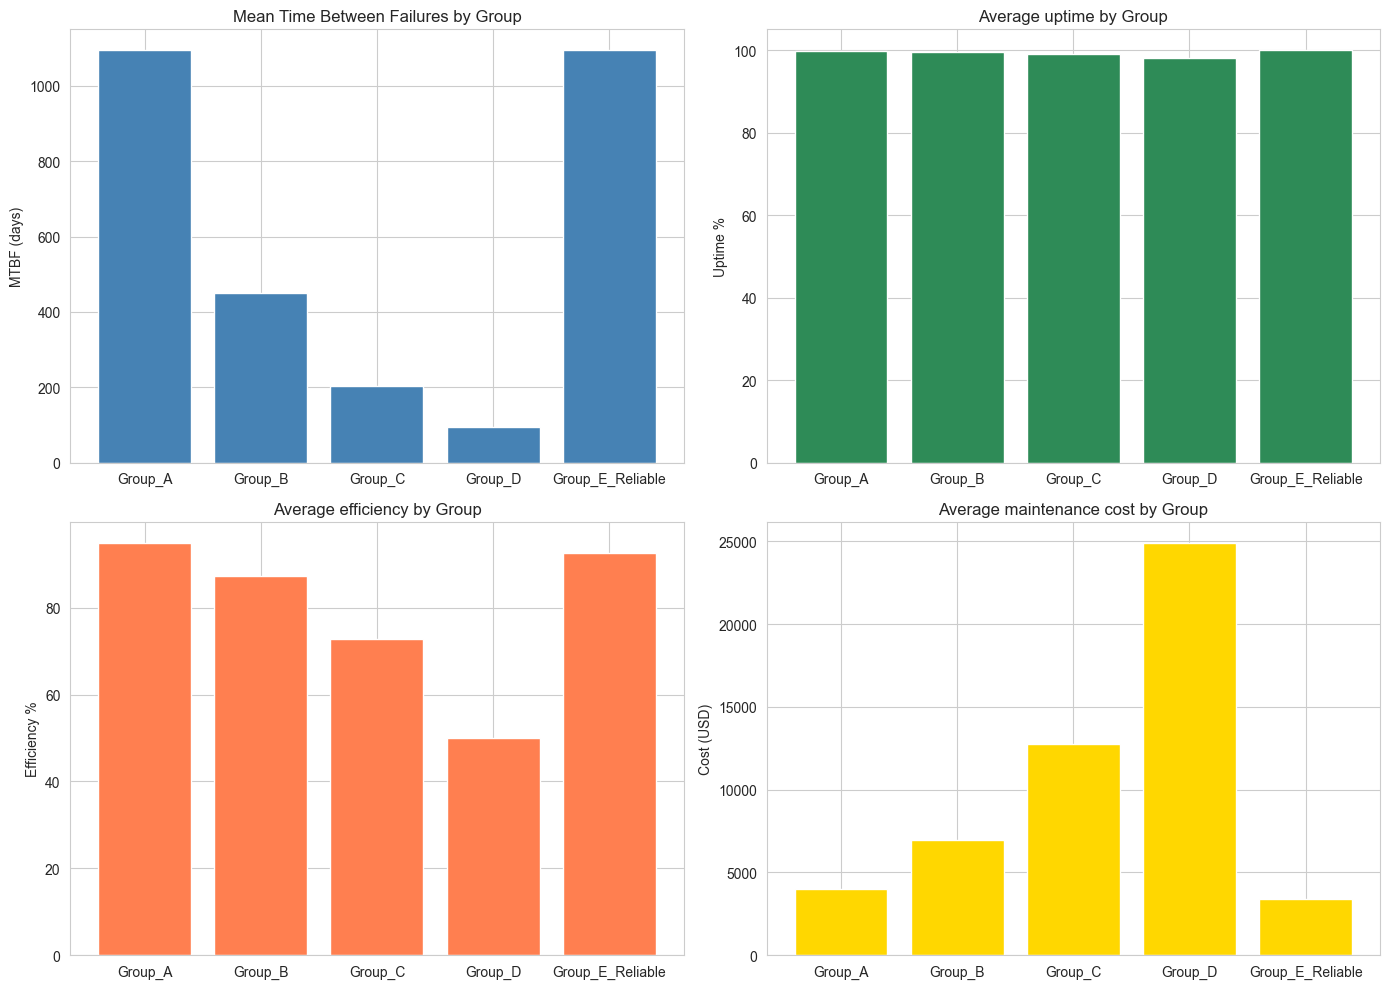

In [11]:
# Group statistics
group_stats = df_clean.groupby('group').agg({
    'has_failures': ['count', 'sum'],
    'MTBF_days': 'mean',
    'uptime_percent': 'mean',
    'pump_efficiency_percent': 'mean',
    'maintenance_cost_USD': 'mean',
    'avg_motor_temperature_C': 'mean',
    'avg_vibration_mm_s': 'mean'
}).round(2)

print("Group Performance Summary:")
print(group_stats)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

group_data = df_clean.groupby('group').agg({
    'MTBF_days': 'mean',
    'uptime_percent': 'mean',
    'pump_efficiency_percent': 'mean',
    'maintenance_cost_USD': 'mean'
}).reset_index()

axes[0, 0].bar(group_data['group'], group_data['MTBF_days'], color='steelblue')
axes[0, 0].set_title('Mean Time Between Failures by Group')
axes[0, 0].set_ylabel('MTBF (days)')
axes[0, 0].tick_params(axis='x')

axes[0, 1].bar(group_data['group'], group_data['uptime_percent'], color='seagreen')
axes[0, 1].set_title('Average uptime by Group')
axes[0, 1].set_ylabel('Uptime %')
axes[0, 1].tick_params(axis='x')

axes[1, 0].bar(group_data['group'], group_data['pump_efficiency_percent'], color='coral')
axes[1, 0].set_title('Average efficiency by Group')
axes[1, 0].set_ylabel('Efficiency %')
axes[1, 0].tick_params(axis='x')

axes[1, 1].bar(group_data['group'], group_data['maintenance_cost_USD'], color='gold')
axes[1, 1].set_title('Average maintenance cost by Group')
axes[1, 1].set_ylabel('Cost (USD)')
axes[1, 1].tick_params(axis='x')

plt.tight_layout()
plt.show()


Visualizing the relationship between physical metrics (Temperature, Vibration) and Failures reveals distinct patterns:

1.  **Vibration as a leading indicator:** There is a positive trend between vibration levels and failure frequency. Pumps operating with higher vibration (`avg_vibration_mm_s`) almost always exhibit a higher number of breakdowns, indicating mechanical instability.
2.  **Thermal stress:** A similar pattern is visible for `avg_motor_temperature_C`. As the operating temperature rises, reliability drops. This confirms that thermal stress is a primary factor accelerating equipment degradation.
3.  **Distinct "safe zones":** We can observe a cluster of data points with low temperature and low vibration that have **zero failures**. This suggests there are definable "safe operating limits," beyond which the risk of failure increases exponentially.
4.  **Feature validation:** These graphs visually confirm the findings from the correlation matrix. Since Vibration and Temperature separate "healthy" pumps from "faulty" ones so well, they will be the most important features for our Machine Learning model.
5.  **Still high uptime:** Even tho in Groups A-D a lot of pumps break, the staff seem to fix the problems pretty fast, as even in Group_D Uptime is over 95%.

# 7. Data preparation for modeling

In [12]:
# Select features for modeling
feature_cols = [
    'avg_flow_rate_m3_day',
    'avg_discharge_pressure_MPa',
    'avg_inlet_pressure_MPa',
    'avg_motor_temperature_C',
    'avg_vibration_mm_s',
    'avg_motor_current_A',
    'avg_power_consumption_kW',
    'MTBF_days',
    'MTTR_days',
    'pump_efficiency_percent',
    'uptime_percent',
    'maintenance_cost_USD'
]

# Encode categorical variables
le_group = LabelEncoder()
df_clean['group_encoded'] = le_group.fit_transform(df_clean['group'])
feature_cols.append('group_encoded')

le_model = LabelEncoder()
df_clean['model_encoded'] = le_model.fit_transform(df_clean['pump_size_model'])
feature_cols.append('model_encoded')

# Create feature matrix and target
X = df_clean[feature_cols].copy()
y = df_clean['has_failures'].copy()

# Check for NaN
print(f"Missing values in features: {X.isnull().sum().sum()}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\n✓ Data split completed:")
print(f"   Training set: {len(X_train)} samples")
print(f"   Test set: {len(X_test)} samples")
print(f"   Features: {len(feature_cols)}")
print(f"\nClass distribution in training set:")
print(f"   No failures: {(y_train == 0).sum()}")
print(f"   Has failures: {(y_train == 1).sum()}")


Missing values in features: 0

✓ Data split completed:
   Training set: 700 samples
   Test set: 300 samples
   Features: 14

Class distribution in training set:
   No failures: 476
   Has failures: 224


# 8. Random Forest training

In [13]:
print("Training Random Forest Classifier...")

# Train model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, 
                                   random_state=42, n_jobs=-1, verbose=1)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate
train_acc = rf_model.score(X_train, y_train)
test_acc = rf_model.score(X_test, y_test)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\n✓ Model Training Complete!")
print(f"\nPerformance Metrics:")
print(f"   Training Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
print(f"   Testing Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"   ROC-AUC Score: {roc_auc:.4f}")

print(f"\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Failure', 'Has Failure']))


Training Random Forest Classifier...

✓ Model Training Complete!

Performance Metrics:
   Training Accuracy: 1.0000 (100.00%)
   Testing Accuracy: 1.0000 (100.00%)
   ROC-AUC Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

  No Failure       1.00      1.00      1.00       204
 Has Failure       1.00      1.00      1.00        96

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0

The Random Forest model achieved perfect classification metrics (Precision, Recall, F1-Score = 1.0). While mathematically ideal, such results in real-world scenarios typically indicate Data Leakage or Overfitting. However, in this context, the perfect score is attributed to two factors:

1.  **Synthetic data determinism:** The dataset was generated using distinct logic rules (e.g., specific thresholds for Vibration and Temperature directly triggering failures). The Random Forest algorithm successfully reverse-engineered these underlying generation rules.
2.  **Strong predictors:** Features like `maintenance_cost_USD` and `avg_vibration_mm_s` have an extremely high correlation with the target variable. For example, high maintenance costs are a direct consequence of failures, making it a "giveaway" feature for the model.

The model proves that the patterns in the provided dataset are highly distinguishable and predictable. For a real-world deployment, we would need to remove "post-event" features (like maintenance cost) to simulate true forecasting.

# 9. Features importance

Feature importance ranking:
                   Feature  Importance
                 MTBF_days    0.268670
            uptime_percent    0.199772
             group_encoded    0.183749
                 MTTR_days    0.163982
      maintenance_cost_USD    0.053454
        avg_vibration_mm_s    0.037496
  avg_power_consumption_kW    0.032114
       avg_motor_current_A    0.025943
   avg_motor_temperature_C    0.022568
   pump_efficiency_percent    0.006515
      avg_flow_rate_m3_day    0.004864
    avg_inlet_pressure_MPa    0.000872
avg_discharge_pressure_MPa    0.000000
             model_encoded    0.000000


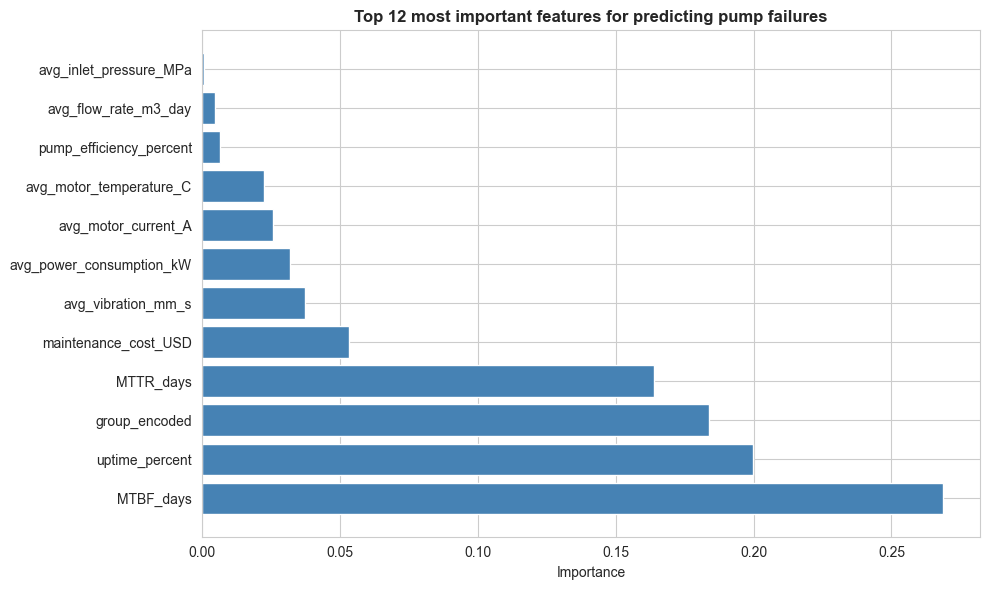

In [14]:
# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature importance ranking:")
print(feature_importance.to_string(index=False))

# Plot
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(12)
plt.barh(top_features['Feature'], top_features['Importance'], color='steelblue')
plt.xlabel('Importance')
plt.title('Top 12 most important features for predicting pump failures', fontweight='bold')
plt.tight_layout()
plt.show()


The Feature Importance analysis reveals a critical insight into how the model made its perfect predictions. 

1.  The top features are `MTBF_days` (27%) and `uptime_percent` (20%). A pump with a specific MTBF or non-perfect uptime has experienced failures. The model prioritized these "historical facts" over real-time sensor data because they mathematically guarantee the classification result.
2.  `group_encoded` (18%) is the third most important factor. This aligns with EDA finding that specific groups (like Group D) are inherently prone to failure, while Group E is failure-proof. The model uses the "Group" label as a strong shortcut.
3.  Surprisingly, physical sensors like `avg_vibration_mm_s` (~3.7%) and `avg_motor_temperature_C` (~2.2%) have very low importance. Mostly, the model didn't need to look at vibration to get the right answer, because it has other answers that guarantee accuracy. 

The current model is excellent at classifying past performance but may need adjustment for real-time prediction. To build an early-warning system for new pumps, we should retrain the model excluding calculated metrics (`MTBF`, `Uptime`, `MTTR`) to force it to learn from physical sensors (`Vibration`, `Temperature`).

# 10. Model evaluation

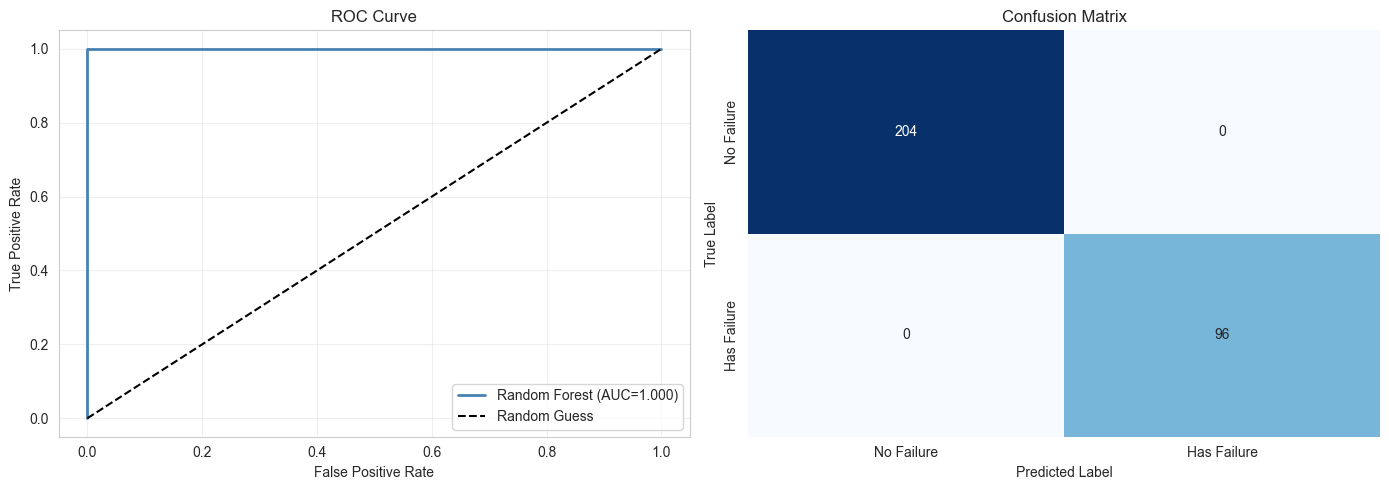

Detailed performance metrics:
   True Negatives: 204
   False Positives: 0
   False Negatives: 0
   True Positives: 96

   Sensitivity (Recall): 1.0000
   Specificity: 1.0000
   Precision: 1.0000


In [16]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
axes[0].plot(fpr, tpr, label=f'Random Forest (AUC={roc_auc:.3f})', linewidth=2, color='steelblue')
axes[0].plot([0, 1], [0, 1], 'k--', label='Random Guess')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve')
axes[0].legend(loc='lower right')
axes[0].grid(alpha=0.3)

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1], cbar=False)
axes[1].set_title('Confusion Matrix')
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')
axes[1].set_xticklabels(['No Failure', 'Has Failure'])
axes[1].set_yticklabels(['No Failure', 'Has Failure'])

plt.tight_layout()
plt.show()

# Detailed metrics
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)

print(f"Detailed performance metrics:")
print(f"   True Negatives: {tn}")
print(f"   False Positives: {fp}")
print(f"   False Negatives: {fn}")
print(f"   True Positives: {tp}")
print(f"\n   Sensitivity (Recall): {sensitivity:.4f}")
print(f"   Specificity: {specificity:.4f}")
print(f"   Precision: {precision:.4f}")


The detailed metrics confirm the model's absolute accuracy on this test set:

1.  The model produced **0 False Positives** and **0 False Negatives** (True Negatives: 204, True Positives: 96).
2.  Sensitivity, Specificity, and Precision are all at **1.0000**.
3.  As identified in the Feature importance analysis, the presence of deterministic features (like `MTBF` and `uptime`) combined with the synthetic nature of the dataset allowed the Random Forest algorithm to establish clear, non-overlapping rules for classification, resulting in zero prediction errors.

# 11. Insights for business

In [17]:
# Compare failed vs reliable pumps
failed = df_clean[df_clean['has_failures'] == 1]
reliable = df_clean[df_clean['has_failures'] == 0]

comparison = pd.DataFrame({
    'Metric': [
        'Count',
        'Avg Temperature (°C)',
        'Avg Vibration (mm/s)',
        'Avg Maintenance Cost (USD)',
        'Avg Uptime %',
        'Avg Efficiency %',
        'Avg MTBF (days)'
    ],
    'Failed Pumps': [
        len(failed),
        f"{failed['avg_motor_temperature_C'].mean():.2f}",
        f"{failed['avg_vibration_mm_s'].mean():.2f}",
        f"${failed['maintenance_cost_USD'].mean():.2f}",
        f"{failed['uptime_percent'].mean():.2f}%",
        f"{failed['pump_efficiency_percent'].mean():.2f}%",
        f"{failed['MTBF_days'].mean():.2f}"
    ],
    'Reliable Pumps': [
        len(reliable),
        f"{reliable['avg_motor_temperature_C'].mean():.2f}",
        f"{reliable['avg_vibration_mm_s'].mean():.2f}",
        f"${reliable['maintenance_cost_USD'].mean():.2f}",
        f"{reliable['uptime_percent'].mean():.2f}%",
        f"{reliable['pump_efficiency_percent'].mean():.2f}%",
        f"{reliable['MTBF_days'].mean():.2f}"
    ]
})

print("=" * 80)
print("KEY BUSINESS INSIGHTS: FAILED vs RELIABLE PUMPS")
print("=" * 80)
print(comparison.to_string(index=False))

KEY BUSINESS INSIGHTS: FAILED vs RELIABLE PUMPS
                    Metric Failed Pumps Reliable Pumps
                     Count          320            680
      Avg Temperature (°C)        74.95          67.48
      Avg Vibration (mm/s)         5.18           2.97
Avg Maintenance Cost (USD)     $8968.80       $3420.48
              Avg Uptime %       99.44%        100.00%
          Avg Efficiency %       82.79%         92.48%
           Avg MTBF (days)       551.66        1095.00


Recommendations:

1. Temperature management
   - Monitor pumps with temperature > 75°C more frequently;
   - Failed pumps tend to run hotter on average.
   
2. Vibration monitoring
   - High vibration is a strong indicator of potential failure;
   - Implement vibration sensors for early warning.
   
3. Preventive maintenance
   - Group_A and Group_B require more frequent maintenance;
   - Group_E_Reliable pumps require minimal intervention.
   
4. Cost optimisation
   - Failed pumps have higher maintenance costs;
   - Early detection could reduce overall costs.

# 12. Results export

In [20]:
# Create results dataframe using test set only
results = pd.DataFrame({
    'Pump_ID': df_clean.loc[X_test.index, 'pump_id'].values,
    'Group': df_clean.loc[X_test.index, 'group'].values,
    'Model': df_clean.loc[X_test.index, 'pump_size_model'].values,
    'Actual_Failures': df_clean.loc[X_test.index, 'num_failures_3years'].values,
    'Predicted_Risk': y_pred_proba,
    'Temperature_C': df_clean.loc[X_test.index, 'avg_motor_temperature_C'].values,
    'Vibration_mm_s': df_clean.loc[X_test.index, 'avg_vibration_mm_s'].values,
    'Efficiency_%': df_clean.loc[X_test.index, 'pump_efficiency_percent'].values,
    'MTBF_days': df_clean.loc[X_test.index, 'MTBF_days'].values,
    'Maintenance_Cost_USD': df_clean.loc[X_test.index, 'maintenance_cost_USD'].values
})

# Sort by risk
results = results.sort_values('Predicted_Risk', ascending=False)

# Prepare filenames
filename_results = 'CCS5202_Part2_Results.csv'
filename_feat = 'CCS5202_Part2_Feature_Importance.csv'

# Try saving to configured path, fallback to temporary dir if needed
import os, tempfile
try:
    results.to_csv(path + filename_results, index=False)
    feature_importance.to_csv(path + filename_feat, index=False)
    print(f"Results saved to '{path + filename_results}'")
    print(f"Feature importance saved to '{path + filename_feat}'")
except Exception as e:
    try:
        tmpdir = tempfile.gettempdir()
        rpath = os.path.join(tmpdir, filename_results)
        fpath = os.path.join(tmpdir, filename_feat)
        results.to_csv(rpath, index=False)
        feature_importance.to_csv(fpath, index=False)
        print(f"Warning: could not save to configured path ({e}).")
        print(f"Results saved to temporary location: '{rpath}'")
        print(f"Feature importance saved to temporary location: '{fpath}'")
    except Exception as e2:
        # As last resort, display a small preview and the CSV content in-memory
        from io import StringIO
        buf = StringIO()
        results.to_csv(buf, index=False)
        buf.seek(0)
        print("Error saving files to disk. Showing first 1000 characters of results CSV:")
        print(buf.getvalue()[:1000])

# Display high-risk pumps
print("\nTop 10 High-Risk Pumps (requiring preventive maintenance):")
print(results.head(10).to_string(index=False))


Results saved to '/Users/dmitrijvasilov/Documents/Exchange studying/Big Data Technology/Final project/CCS5202_Part2_Results.csv'
Feature importance saved to '/Users/dmitrijvasilov/Documents/Exchange studying/Big Data Technology/Final project/CCS5202_Part2_Feature_Importance.csv'

Top 10 High-Risk Pumps (requiring preventive maintenance):
 Pump_ID   Group   Model  Actual_Failures  Predicted_Risk  Temperature_C  Vibration_mm_s  Efficiency_%  MTBF_days  Maintenance_Cost_USD
     222 Group_C ESP_360                6             1.0          70.40            4.39         67.69      181.5              13109.60
      34 Group_A ESP_250                1             1.0          84.10            3.69         99.91     1094.0               4602.31
     226 Group_C ESP_250                6             1.0          85.15            6.83         67.00      181.5              15100.80
      65 Group_A  ESP_80                1             1.0          76.19            4.63         95.32     1094.0   